In [1]:
import matplotlib.pyplot as plt
import numpy as np

from slap2_utils.datafile import DataFile
from slap2_utils.subclasses.metadata import MetaData
from slap2_utils.utils.trace import Trace




28
MetaData Loaded
[-10203, 229.0, 231.0, 233.0, 235.0, 237.0, 239.0, 241.0, 243.0, 245.0, 247.0, 249.0, 251.0, 253.0, 255.0, 257.0, 259.0, 261.0, 263.0, 265.0, 267.0, 269.0, 271.0, 273.0, 275.0, 277.0, 279.0, 281.0, 283.0]


C:\Users\Jerry\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


103888


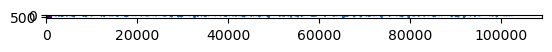

In [2]:
hDataFile = DataFile('C:\\Users\\Jerry\\Desktop\\240109_Sim3D\\WorkingFile_20231220_150500_DMD1.dat');
roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData
#metaData.AcquisitionContainer.ROIs[0].shapeData
zIdx = hDataFile.fastZs.index(hDataFile.metaData.AcquisitionContainer.ROIs[0].z)
#print(zIdx)
chIdx = 1;

from skimage.draw import polygon_perimeter

roi_shape = hDataFile.metaData.AcquisitionContainer.ROIs[0].shapeData

img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)


# VERY IMPORTANT
for i in range(len(rr)):
    rr[i] = rr[i] - 1
    
for j in range(len(cc)):
    cc[j] = cc[j] - 1

img[rr, cc] = 1

plt.imshow(img)

#rasterPixels = pixelMask;
#integrationPixels = pixelMask;

pixelMask=np.full((800, 1280), False)
pixelMask[img==1] = True

rasterPixels = np.full((800, 1280), False)
integrationPixels = pixelMask;
hTrace = Trace(hDataFile, zIdx, chIdx)
i = 0
for i in range(len(pixelMask)):
    try:
        x = np.where(pixelMask[i] == 1)
        if len(x[0]) == 0:
            raise ValueError
        #print(i)
        #print(x)
    except ValueError:
        continue
hTrace.setPixelIdxs(rasterPixels, integrationPixels);
#windowWidth_lines = 10;
#expectedWindowWidth_lines = 100;
#trace = hTrace.process(windowWidth_lines,expectedWindowWidth_lines);
_trace, _, _, _ = hTrace.process(10, 100)
print(len(_trace))
plt.plot(_trace)

80.35055


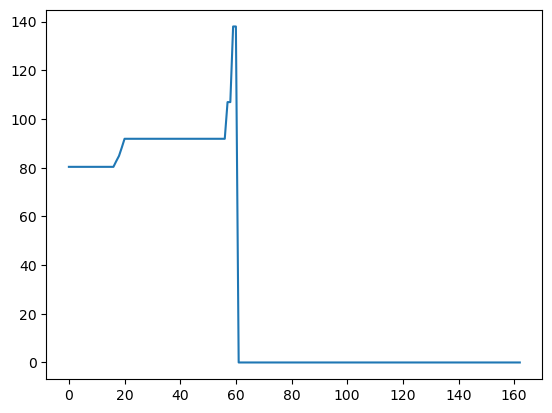

In [3]:
plt.plot(_trace[0:163])
print(_trace[0])


Integrate


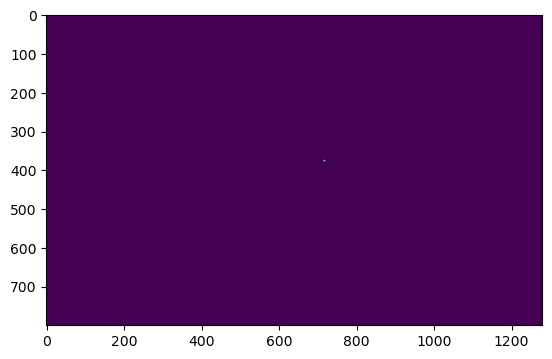

In [6]:
testMeta = MetaData('C:\\Users\\Jerry\\Desktop\\240109_Sim3D\\WorkingFile_20231220_150500_DMD1.meta')
roi_shape = testMeta.AcquisitionContainer.ROIs[0].shapeData
print(testMeta.AcquisitionContainer.ROIs[0].imageMode)


img = np.zeros((800, 1280), dtype=np.uint8)

rr, cc = polygon_perimeter(roi_shape[0,:], roi_shape[1,:],

                           shape=img.shape, clip=True)
img[rr, cc] = 1

plt.imshow(img)


In [ ]:
print(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan']['sliceIdx'])
(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan']['superPixelID'])

In [ ]:
hDataFile.zPixelReplacementMaps

In [ ]:
hDataFile.header['linesPerCycle']

In [ ]:
print(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][6:9])
(hDataFile.metaData.AcquisitionContainer.ParsePlan['acqParsePlan'][9:13])